<a href="https://colab.research.google.com/github/KCemOzdemir/DerinOgrenme/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Pre-Process, visualization ve split için gerekli kütüphaneleri ekliyoruz
from __future__ import print_function
import keras
from keras.datasets import mnist
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Bulunduğumuz Folderi seçiyoruz ve hangi folderda olduğumuzu teyit ediyoruz
import os
os.chdir("/content/drive/MyDrive/mnistrt")
!pwd

/content/drive/MyDrive/mnistrt


In [3]:
#Kaggledan drivemıza indirdiğimiz digit-recognizer.zip dosyasını unzip ediyoruz
from zipfile import ZipFile
with ZipFile('digit-recognizer.zip','r') as zipObj:
  zipObj.extractall()

In [4]:
#train datasını okuyoruz
train = pd.read_csv('/content/drive/MyDrive/mnistrt/train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#test datasını okuyoruz
test = pd.read_csv('/content/drive/MyDrive/mnistrt/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#etiketliyor ve sütuna drop ediyoruz
Y_train = train['label']
X_train = train.drop(labels=['label'],axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

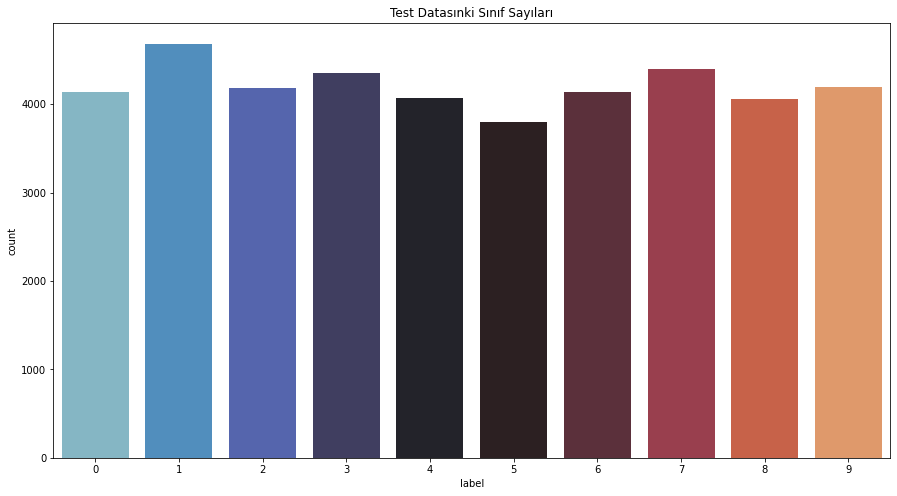

In [7]:
#rakamların sınıf sayılarını gösteriyoruz
plt.figure(figsize=(15,8))
g = sns.countplot(Y_train,palette='icefire')
plt.title("Test Datasınki Sınıf Sayıları")
Y_train.value_counts()

In [8]:
#Normalization, Reshape ve Label Encode işlemlerini yapıyoruz
X_train = X_train / 255.0
test = test / 255.0
print("X_train shape : ", X_train.shape)
print("test shape : ", test.shape)
print("----------------Reshape------------------------")
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)
#Label Encode işlemi
from keras.utils.np_utils import to_categorical # one-hot-encoding kısaca elma 1 0 0 : 93 armut 0 1 0 : 83 palamut 0 0 1 : 24
Y_train = to_categorical(Y_train, num_classes = 10)

X_train shape :  (42000, 784)
test shape :  (28000, 784)
----------------Reshape------------------------
x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [9]:
#Train ve test datasını bölme (split etme işlemi)
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
#burada eğitim için datanın %90 ını seçtik %10 ise test için
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)


x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


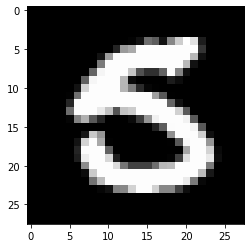

In [10]:
#tüm yapılan pre-process ve split işlemi ardından eğitimde kullanılacak 1 tane elamı görselleştirelim
plt.imshow(X_train[4][:,:,0],cmap='gray')
plt.show()

In [ ]:
#Bu aşamaya kadar yapılan işlemler sırasıyla.
#Gerekli kütüphaneleri implement ettik.
#Test ve train datamızın olduğu folderı işlem alanı olarak seçtik.
#Sonrasında gerekli datalarımızı (test.csv ve train.csv) ilgili değişkenlere atadık
#Değişkenlerin Labeling işlemlerini yaptık
#Ardından Pre-Process denilen ön işlemlere tabi tuttuk bu ön işlemler sırasıyla
#   1-) Normalizasyon : CNN hızlı çalışması için ışıklandırma faktörü farkını minimize etmemize yaradı
#   2-) Reshape : 28x28 olan image datalarımızı 28x28x1 olarak reshape ettik yani gray scale taşıdık
#   3-) Label Encoding : Etiketleri one-hot-vector diye tanımladığımız duruma geçirdik 2 --> 0010000000 4-->0000100000 tarzında
#   4-) Split : Eğitim ve doğrulama için verimizi bölütledik %90 Train %10 Validation

# Bu aşamalardan sonra CNN işlemine geçeceğiz.

In [ ]:
#CNN : Convolutional Neural Network
# Bu aşamada CNN için gerekli olan aşamaları sırasıyla göreceğiz
# 1-) Öncelikle Convolution işleminden bahsedelim Conv. işlemi frekans domeninde karşılığı çarpmaktır ve image verilerini frekans bazlı düşünmeliyiz.
# 2-) Conv işlemini yapmak için bir adet kernel(filter) ihtiyacımız var bu kerneller çıkarmak istediğimiz özelliklere göre seçilmelidir.
# 3-) Özelliklerini bulmak istediğimiz işleme göre seçilen kernel ile datamız conv işlemine tabi tutulur
# 4-) Conv işleminden sonra görüntü boyutu belli bir kurala göre küçülür fakat kanal sayısı artar her kanal belli özellikleri tutar
# 5-) Conv işlemi sırasında bir adet aktivasyon fonksiyonu kullanırız bu isteğe göre seçilebilir örn : relu, tanh vb.
# 6-) Özellik haritalarını downsample etmek amacıyla (performans katkısı) pooling işlemine geçeriz (bu adım zorunlu değildir)
# 7-) Pooling işlemi 2x2 bir matrix alanında maksimum, ortalama veya bir kurala göre seçilebilir örneğimde max pooling kullandım
# 8-) Pooling işmeninde kanal sayısı sabit kalır fakat WxH küçülme olur yukarıda da bahsettiğim gibi downsampling
# 9-) Pooling işleminden sonra tekrar bir conv işlemi kullanıyoruz buradaki amaç özellikleri çıkartılmış veriden daha salt özellikler temin etmek
# 10-) 2. Conv işleminden sonra tekrar bir pooling işlemine tabi tutuyoruz ve salt özellikleri bu adımda keskinleştiriyoruz
# 11-) Pooling layer çıkışını flattening işlemine tabi tutuyor ve sonrasında standart bir ANN işlemine geçiş yapıyoruz

In [11]:
# Şimdi yukarıda anlattığımız işlemleri Keras ile koda dökelim
# Öncelikle Keras ve sklearns kütüphanelerinde kullanacağımız modülleri implement ediyoruz
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters=8,
                 kernel_size=(5,5),
                 padding='Same',
                 activation='relu',
                 input_shape=(28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=16, 
                 kernel_size=(3,3), 
                 padding='Same', 
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), 
                    strides=(2,2)))

model.add(Dropout(0.25))

#FC katmanı

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(10, activation='softmax'))

In [12]:
#CNN sistemimizi görselleştirelim
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

In [13]:
#Şimdi Optimizerimizi Seçelim ve öğrenme oranımızı ayarlayalım buradaki amaç learning rate küçükse min noktasına yavaş gideriz bunu hızlandırmak için kullanıyoruz
#Bu çalışmada Adam optimizer seçtim ve kütüphanenin önerilen değerleriyle kullandım

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [14]:
#Pre Process, model kurulumu, optimizer seçimi ardından modelimizi compile ediyoruz
#Burada modelimizi compile etmek için kullandığımız loss func. categorial_crossentropy multi class çalıştığımız için tercih edildi
#Ayrıca çıkan sonucu accuracy'e göre değerlendirmesini sağlıyoruz

model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=['accuracy'])

In [19]:
#Epochs ve Batch Size Seçimlerini yapalım
#Batch Size : Forward ve Back Propagation'da yani öğrenme aşamasında kaç adet fotoğraf, data vb. kullanılacağımızı belirtir
#Epochs : Kaç kez Forward ve Back Propagation yapacağımızın sayısıdır
#Daha profesyonelce bir tabir ve örneklendirerek anlatırsak elimizde 10 adet fotoğraf olduğunu düşünelim
# -Batch size 2 olarak belirlersek FP ve BP için her seferinde 2 fotoğraf kullanacağız
# -2 Resim FP 2 Resim BP kaldı 8 (döngüsel olarak düşün)
# -10 Fotoğrafı harcamak için 10/2 = 5 kez tekrar edilir yani batch = 5 dir
# -5 Kez bu işlem tekrarlandığında bu bir epoch karşılık gelir (5 iterations per epoch)
# -Yani 3 epoch yapmak istersem ben 3*5=15 Epoch yapacağım

epochs = 15
batch_size = 250

In [20]:
#Data Augmentation aşaması
#Data Augmentation overfitting(ezberleme,aşırı öğrenme) gibi problemlerin önüne geçmek için elde olan veriyi belli normlarda farklılaştırma işlemidir

datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             rotation_range=0.5, 
                             zoom_range=0.5, 
                             width_shift_range=0.5, 
                             height_shift_range=0.5, 
                             horizontal_flip=False, 
                             vertical_flip=False)

datagen.fit(X_train)


In [21]:
#Şimdi modelimizi fit edip train edebiliriz öğrenmeye başlayalım
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size), 
                              steps_per_epoch=X_train.shape[0] // batch_size, 
                              epochs=epochs,verbose=1, 
                              validation_data=(X_val, Y_val))

Epoch 1/15
  1/151 [..............................] - ETA: 9s - loss: 1.4610 - accuracy: 0.5360

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


151/151 [==============================] - 9s 62ms/step - loss: 1.4130 - accuracy: 0.5170 - val_loss: 0.4003 - val_accuracy: 0.9014
Epoch 2/15
151/151 [==============================] - 9s 59ms/step - loss: 1.3809 - accuracy: 0.5299 - val_loss: 0.3648 - val_accuracy: 0.9126
Epoch 3/15
151/151 [==============================] - 9s 60ms/step - loss: 1.3487 - accuracy: 0.5387 - val_loss: 0.3333 - val_accuracy: 0.9150
Epoch 4/15
151/151 [==============================] - 9s 58ms/step - loss: 1.3184 - accuracy: 0.5510 - val_loss: 0.3053 - val_accuracy: 0.9229
Epoch 5/15
151/151 [==============================] - 9s 58ms/step - loss: 1.2869 - accuracy: 0.5619 - val_loss: 0.2939 - val_accuracy: 0.9250
Epoch 6/15
151/151 [==============================] - 9s 59ms/step - loss: 1.2662 - accuracy: 0.5693 - val_loss: 0.2783 - val_accuracy: 0.9250
Epoch 7/15
151/151 [==============================] - 9s 60ms/step - loss: 1.2554 - accuracy: 0.5733 - val_loss: 0.2689 - val_accuracy: 0.9260
Epoch 8/15

In [ ]:
#Epoch 1/3
#151/151 [==============================] - 15s 60ms/step - loss: 2.2571 - accuracy: 0.1419 - val_loss: 1.7497 - val_accuracy: 0.4210
#Epoch 2/3
#151/151 [==============================] - 9s 59ms/step - loss: 1.9517 - accuracy: 0.3004 - val_loss: 1.1766 - val_accuracy: 0.7129
#Epoch 3/3
#151/151 [==============================] - 9s 58ms/step - loss: 1.7399 - accuracy: 0.3865 - val_loss: 0.8499 - val_accuracy: 0.7964

#3 Epoch ile acc oranım çok düşük çıktı yükseltmek için acc oranını artırıyorum 15e çektim
#Burada bir hata yaptım galiba öğrenme çok yavaşladı batch size küçültüp veya büyültüp tekrar denemem lazım
#15 epoch ile sonuç aşağıda bence daha hızlı ve daha yüksek bir acc yakalayabilirim.
#Epoch 15/15
#151/151 [==============================] - 9s 59ms/step - loss: 1.1441 - accuracy: 0.6098 - val_loss: 0.1877 - val_accuracy: 0.9521

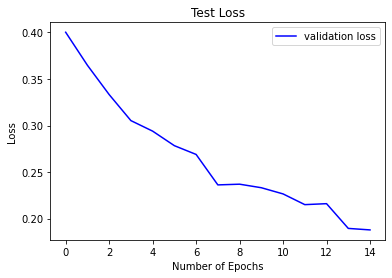

In [22]:
#Şimdi 15 Epoch ile yaptığım eğitimin validation loss visualizationına ve confusion matrix değerine bakalım

plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Düzgün bir curve yakalayamadım belli yerlerde ripple veya kırılma var hyperparameters ile oynayıp bunları düzeltebilirim
#TODO : Hiperparametreleri elden geçir.

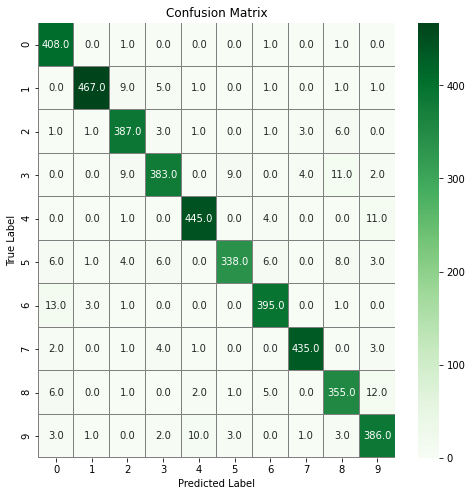

In [23]:
#Şimdi Confusion Matrixine bakalım
import seaborn as sns

Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(Y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [24]:
#Confusion matrixi yorumlarsam
# 6 ile 0 değeri en fazla karıştırılan değer olmuş
# En yüksek eşlenim ise 1 ile 1 arasında gerçekleşmiş